# Intertemporal Choice: Problem Set 4

Matt Zahn

November 4, 2018

In [1]:
# Some initial setup

import sys 
import os
sys.path.insert(0, os.path.abspath('../lib'))


from matplotlib import pyplot as plt
import math as math
import numpy as np
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')
from copy  import deepcopy
import HARK # Prevents import error from Demos repo
from time import clock
mystr = lambda number : "{:.3f}".format(number)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from HARK.utilities import plotFuncs
from HARK.ConsumptionSaving.TractableBufferStockModel import TractableConsumerType

## Problem 1) Buffer Stock Saving and Balance Sheets

The Great Recession was particularly severe in economies that experienced a larger run-up in household debt prior to the crisis. Three sets of papers have confirmed this pattern. The following questions will ask you to interpret this pattern using a modified version of the tractable buffer stock model of saving.

## Part a)

In the modified model, an unemployed person receives an unemployment benefit proportional to their labor income $l_0W_0$ had they remained employed in period $0$. Assume that these benefits are financed by a new source of revenue and do not affect the employed consumer's budget constraint. 

### Part a.i)

Define the benefit as $N_0 = \eta l_0 W_0$, where $0 < \eta < 1$, which means the benefit is positive but smaller than their labor income would have been if they remained employed. If a consumer in any period $t$ ends up in debt ($A_t<0$), a lender that does not receive an interest payment of $-rA_t$ in period $t+1$ can seize an amount less than or equal to the jobless benefit $N_0$, regardless of their employment status. Why would an infinitely risk-averse private lender will be willing to lend an employed consumer less than: $\bar{H}_{-1} \equiv N_0 / r$.

The PDV of the unemployment benefit is:

\begin{eqnarray*}
PDV(N_0) &=& N_0 \left(\frac{R}{R-1}\right) \\
\\
PDV(N_0) &=& N_0 \left(\frac{R}{r}\right) \\
\end{eqnarray*}

Because this payment is guaranteed by the government a lender can be confident that an employed borrower will have at least this amount of money each period. Additionally, it is clear that $N_0 \left(\frac{R}{r}\right) > \frac{N_0}{r}$ so the lender can be confident that the borrower will have enough money each period such that the will be able to pay the loan back. The risk adverse lender will also want to ensure that the borrower has a sufficient amount of income to make the minimal interest payment $rA_t$. It is clear that lending $\bar{H}_{-1}$ will meet this qualification:

\begin{eqnarray*}
rA_t &\leq& N_0 \\
\\
A_t &\leq& \frac{N_0}{r} \rightarrow \bar{H}_{-1} \\
\end{eqnarray*}

If the consumer ends their employment with $A_t$ in assets, then they will be able to pay off any interest on the loan in each future period. Thus even the most risk adverse lender will be willing to lend $\bar{H}_{-1}$ to an employed consumer under this system.  

### Part a.ii)

Explain the role of the return impatience condition: $(R\beta)^{1/\rho}/R < 1$ in guaranteeing that the solution to the unemployed consumer's problem makes sense, in that a consumer who has ended employment with:

$$ A_{-1} > \bar{H}_{-1} \equiv -N_0/r $$

will have strictly positive consumption throughout their unemployed life. 

Under the TBS model, an unemployed consumer can never become employed again. In this context, they will only be able to consume out of their existing bank balances and the unemployment benefit at a stable rate. Formally:

$$ c_t = (b_t + N_0)\kappa$$

The return impatience condition ensures that the PDV of future consumption is finite. Within this model $\kappa = 1 - (R\beta)^{1/\rho}/R$. Mechanically, if return impatience holds, then $\kappa > 0$, which contributes to a positive level of consumption into the future. Additionally, this consumer is ending their employment with a level of assets greater than $\bar{H}_{-1}$, which ensures that $(b_t + N_0) > 0$. With this level of assets and return impatience holding, the unemployed agent will have strictly positive consumption for the remainder of their life.  

### Part a.iii)

Explain why the existence of this unemployment insurance system is equivalent (i.e, implications for the path of consumption) to a system in which newly unemployed consumers receive a lump sum payment of $N_0(R/r)$ upon entering their first period of unemployment. 

Under both unemployment insurance systems, consumption will increase by a factor of $(R\beta)^{1/\rho}$ and agents will consume a fixed proportion of their resources each period ($\kappa$). Assuming that return impatience holds, both systems ensure that consumption will remain strictly positive throughout their unemployed life. More generally, neither of these programs will produce a different budget constraint for the consumer. In terms of determining consumption under a perfect foresight model, a consistent stream of payments each period will not produce a different result than an initial lump sum payment equal to the PDV of all the future payments. These models use the PDV of future income streams when income will be earned in the future to determine the level of consumption. Thus, neither of these unemployment insurance systems will produce meaningfully different results for the path of consumption. 

### Part a.iv)

Call the equivalent lump sum $\varsigma l W$, and suppose that for an employed consumer, labor income grows by a factor of $\Gamma$ each year. Defining lower case variables as upper case variables divided by $l W$, explain why $\bar{h}_{-1} = \varsigma = \eta \Gamma/r$.

\begin{eqnarray*}
\bar{h}_{-1} &=& \frac{\bar{H}_{-1}}{l_{-1}W_{-1}} \\ 
\\
\bar{h}_{-1} &=& \frac{\frac{N_0}{r}}{l_{-1}W_{-1}} \\
\\
\bar{h}_{-1} &=& \frac{\frac{\eta l_0 W_0}{r}}{l_{-1}W_{-1}} \\
\\
\bar{h}_{-1} &=& \frac{\frac{\eta l_{-1} W_{-1} \Gamma}{r}}{l_{-1}W_{-1}} \\
\\
\bar{h}_{-1} &=& \frac{\eta \Gamma}{r} = \varsigma \\
\end{eqnarray*}

### Part a.v)

Explain why the effect of introducing such a system results in a shift of the consumption function in the phase diagram to the left by the amount $\bar{h} = \eta/r$. Draw an example of a leftward shift that is so large that the target ratio of bank balances $b$ is negative (the consumer will be in debt at the steady state). 

The introduction of this unemployment benefit shifts the consumption function to the left because the benefit allows agents that are in some level of debt will be able to consume a positive amount. The size of the shift is equal to the normalized amount of the unemployment benefit. If the agent is not in debt beyond this amount, then they will be guaranteed a positive level of consumption. If the agent is in debt beyond the size of the unemployment benefit, they may not have a positive level of consumption, as it would depend on the size of their existing bank balances and whether or not the return impatience condition holds.   

In [2]:
# Baseline set up for TBS Model 
# Define a parameter dictionary and representation of the agents for the tractable buffer stock model
TBS_dictionary =  {'UnempPrb' : .00625,    # Probability of becoming unemployed
                   'DiscFac' : 0.975,      # Intertemporal discount factor
                   'Rfree' : 1.01,         # Risk-free interest factor on assets
                   'rfree' : 0.01,
                   'PermGroFac' : 1.0025,  # Permanent income growth factor (uncompensated)
                   'CRRA' : 2.5}           # Coefficient of relative risk aversion
MyTBStype = TractableConsumerType(**TBS_dictionary)
MyTBStype.solve()

# Define market resources
mMin = 0
mMax = 50
m = np.linspace(mMin,mMax,num=100,endpoint=True)
mTarg = MyTBStype.mTarg

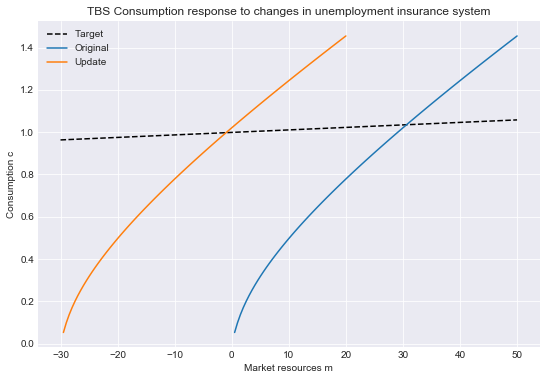

In [3]:
# Consumption functions
plt.figure(figsize=((9,6)))

# Baseline
orig = MyTBStype.solution[0].cFunc(m)

# Change due to increase unemployment benefit
m2 = m - 30
update = MyTBStype.solution[0].cFunc(m)

# Plot target
plt.plot([-30,mMax],[(MyTBStype.PermGroFacCmp/MyTBStype.Rfree + -30*(1.0-MyTBStype.PermGroFacCmp/MyTBStype.Rfree)),
                      (MyTBStype.PermGroFacCmp/MyTBStype.Rfree + mMax*(1.0-MyTBStype.PermGroFacCmp/MyTBStype.Rfree))],
         '--k', label = "Target")

# Plot
plt.plot(m, orig, label ='Original')
plt.plot(m2, update, label ='Update')
plt.xlabel('Market resources m')
plt.ylabel('Consumption c')
plt.title("TBS Consumption response to changes in unemployment insurance system")
plt.legend()
plt.show()

### Part a.vi)

Explain why an expansion of unemployment benefits corresponds to a relaxation of the "natural borrowing constraint". 

Absent an assistance program, an unemployed person with no income stream would have a hard time getting a loan. It is fair to say that if they were also in debt, it would likely be close to impossible. Introducing an unemployment benefit system helps relax this constraint by giving these agents an income stream that could enable them to borrow money if they were in situations they might not otherwise have been able to barring the introduction of the benefit. As the benefit gets larger, the constraint is more relaxed as the consumer has more money that could borrow against. 

## Part b)

Using this model, for each of the experiments below, show how the phase diagram changes and the path of personal saving rates for debtors leading up to, during, and after the experiment. 

### Part b.i)

Without warning, consumers believe that the probability of becoming unemployed is lower forever. This optimism lasts for six years before reverting back to the original expectation. 

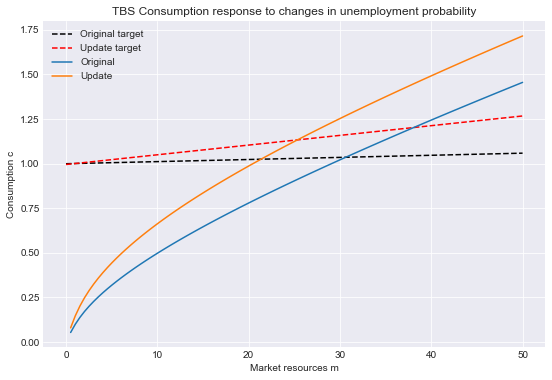

In [4]:
# Consumption functions
plt.figure(figsize=((9,6)))

# Baseline
orig = MyTBStype.solution[0].cFunc(m)

# Plot target
plt.plot([mMin,mMax],[(MyTBStype.PermGroFacCmp/MyTBStype.Rfree + mMin*(1.0-MyTBStype.PermGroFacCmp/MyTBStype.Rfree)),
                      (MyTBStype.PermGroFacCmp/MyTBStype.Rfree + mMax*(1.0-MyTBStype.PermGroFacCmp/MyTBStype.Rfree))],
         '--k', label = "Original target")

# Change due to lower probability of unemployment
MyTBStype.UnempPrb = 0.00200
MyTBStype.solve()
update = MyTBStype.solution[0].cFunc(m)

# Plot target
plt.plot([mMin,mMax],[(MyTBStype.PermGroFacCmp/MyTBStype.Rfree + mMin*(1.0-MyTBStype.PermGroFacCmp/MyTBStype.Rfree)),
                      (MyTBStype.PermGroFacCmp/MyTBStype.Rfree + mMax*(1.0-MyTBStype.PermGroFacCmp/MyTBStype.Rfree))],
         '--r', label = "Update target")

# Reset to baseline
MyTBStype.UnempPrb = 0.00625
MyTBStype.solve()

# Plot
plt.plot(m, orig, label ='Original')
plt.plot(m, update, label ='Update')
plt.xlabel('Market resources m')
plt.ylabel('Consumption c')
plt.title("TBS Consumption response to changes in unemployment probability")
plt.legend()
plt.show()

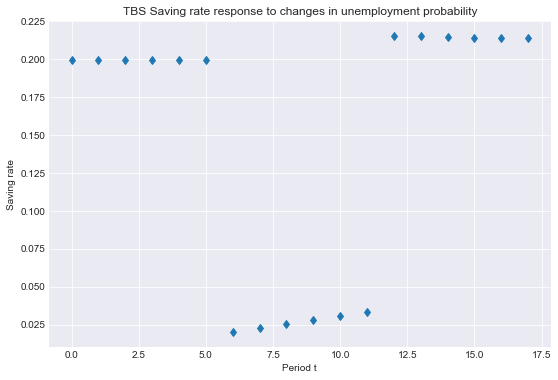

In [5]:
# Simulation 1: 18 periods. 6 periods with original expectation. 6 periods with new expecation. 6 periods back to old.
# Set up run time
periods = 18

# Set up parameter vectors
t = []
c_t = []
m_t = [mTarg]
a_t = []
s_t = []
p_t = [1] # Normalized wage
w_t = 1 # Initial wage

# Parameters
# Factor by which labor income grows
gamma = MyTBStype.PermGroFac/(1-MyTBStype.UnempPrb) 

# Normalized interest rate 
curly_r = MyTBStype.Rfree / (gamma*w_t)

for i in range(periods):
    
    t.append(i) 
    last_period = i - 1
       
    #if i <= 5 or i >= 12:
    if i == 12:
        MyTBStype.UnempPrb = 0.00625
        MyTBStype.solve()
        
    #else:
    if i == 6:
        MyTBStype.UnempPrb = 0.00200
        MyTBStype.solve()
    
    if i == 0:
        m_est = m_t[i] / (gamma*w_t)
        
    if i != 0:
        # Update wage vector
        p_t.append(1)
        
        # Update market resources
        m_est = (a_t[last_period] * curly_r) + p_t[i]
        m_t.append(m_est)
        
    # Estimate current consumption
    c_est =  MyTBStype.solution[0].cFunc(m_t[i])
    c_t.append(c_est)

    # Define savings rate
    income = ((m_t[i] - 1)/MyTBStype.Rfree)*MyTBStype.rfree + 1  
    s_est = (income - c_t[i]) / income
    s_t.append(s_est)     

    # Define current assets
    a_est = m_t[i] - c_est
    a_t.append(a_est)


plt.figure(figsize=((9,6)))
plt.plot(t, s_t, "d")
plt.xlabel('Period t')
plt.ylabel('Saving rate')
plt.title("TBS Saving rate response to changes in unemployment probability")
plt.show()

### Part b.ii)

Suddenly without warning, consumers become more optimistic about income growth: They believe that this is a permanent improvement in $\Gamma$. This period of optimism lasts for six years, suddenly reverses itself (growth expectations revert to their previous value.

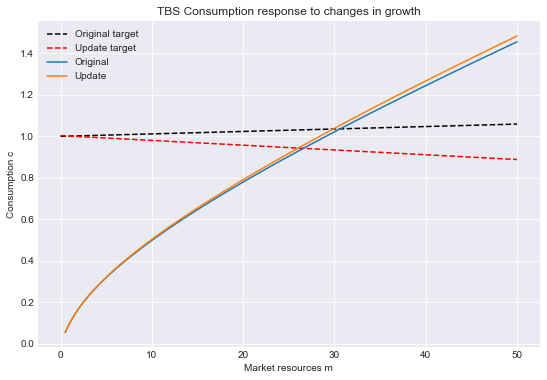

In [6]:
# Consumption functions
plt.figure(figsize=((9,6)))

# Baseline
orig = MyTBStype.solution[0].cFunc(m)

# Plot target
plt.plot([mMin,mMax],[(MyTBStype.PermGroFacCmp/MyTBStype.Rfree + mMin*(1.0-MyTBStype.PermGroFacCmp/MyTBStype.Rfree)),
                      (MyTBStype.PermGroFacCmp/MyTBStype.Rfree + mMax*(1.0-MyTBStype.PermGroFacCmp/MyTBStype.Rfree))],
         '--k', label = "Original target")

# Change due to higher growth
MyTBStype.PermGroFac = 1.006
MyTBStype.solve()
update = MyTBStype.solution[0].cFunc(m)

# Plot target
plt.plot([mMin,mMax],[(MyTBStype.PermGroFacCmp/MyTBStype.Rfree + mMin*(1.0-MyTBStype.PermGroFacCmp/MyTBStype.Rfree)),
                      (MyTBStype.PermGroFacCmp/MyTBStype.Rfree + mMax*(1.0-MyTBStype.PermGroFacCmp/MyTBStype.Rfree))],
         '--r', label = "Update target")

# Reset to baseline
MyTBStype.PermGroFac = 1.0025
MyTBStype.solve()

# Plot
plt.plot(m, orig, label ='Original')
plt.plot(m, update, label ='Update')
plt.xlabel('Market resources m')
plt.ylabel('Consumption c')
plt.title("TBS Consumption response to changes in growth")
plt.legend()
plt.show()

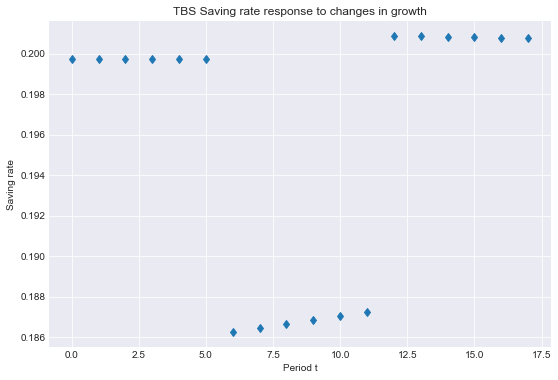

In [7]:
# Simulation 2: 18 periods. 6 periods with original expectation. 6 periods with new expecation. 6 periods back to old.
# Set up run time
periods = 18

# Set up parameter vectors
t = []
c_t = []
m_t = [mTarg]
a_t = []
s_t = []
p_t = [1] # Normalized wage
w_t = 1 # Initial wage

# Parameters
# Factor by which labor income grows 
gamma = MyTBStype.PermGroFac/(1-MyTBStype.UnempPrb) 

# Normalized interest rate 
curly_r = MyTBStype.Rfree / (gamma*w_t)

for i in range(periods):
    
    t.append(i) 
    last_period = i - 1
       
    #if i <= 5 or i >= 12:
    if i == 12:
        MyTBStype.PermGroFac = 1.0025
        MyTBStype.solve()
        
     #else:
    if i == 6:
        MyTBStype.PermGroFac = 1.006
        MyTBStype.solve()
        
    if i == 0:
        m_est = m_t[i] / (gamma*w_t)
        
    if i != 0:
        # Update wage vector
        p_t.append(1)
        
        # Update market resources
        m_est = (a_t[last_period] * curly_r) + p_t[i]
        m_t.append(m_est)
        
    # Estimate current consumption
    c_est =  MyTBStype.solution[0].cFunc(m_t[i])
    c_t.append(c_est)
    
    # Define savings rate
    income = ((m_t[i] - 1)/MyTBStype.Rfree)*MyTBStype.rfree + 1
        
    s_est = (income - c_t[i]) / income
    s_t.append(s_est)    

    # Define current assets
    a_est = m_t[i] - c_est
    a_t.append(a_est)

plt.figure(figsize=((9,6)))
plt.plot(t, s_t, "d")
plt.xlabel('Period t')
plt.ylabel('Saving rate')
plt.title("TBS Saving rate response to changes in growth")
plt.show()

### Part b.iii)

Suddenly without warning, the government announces a permanent increase in the generosity of the unemployment insurance system. Specifically $\eta$ goes from $\eta$ before period $t$ to $\bar{\eta} > \eta$ in period $t$. Everybody believes that the change is permanent. For six years, the change in the program persists. Then, without warning, the government reduces the generosity of the unemployment to its original level ($\bar{\eta}$ goes back down to $\eta$).

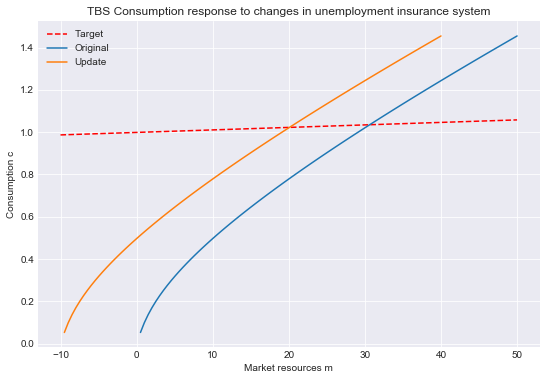

In [8]:
# Consumption functions
plt.figure(figsize=((9,6)))

# Baseline
orig = MyTBStype.solution[0].cFunc(m)

# Plot target
#plt.plot([-10,mMax],[(MyTBStype.PermGroFacCmp/MyTBStype.Rfree + -10*(1.0-MyTBStype.PermGroFacCmp/MyTBStype.Rfree)),
#                      (MyTBStype.PermGroFacCmp/MyTBStype.Rfree + mMax*(1.0-MyTBStype.PermGroFacCmp/MyTBStype.Rfree))],
#         '--k', label = "Original target")

# Change due to increase unemployment benefit
m2 = m - 10
update = MyTBStype.solution[0].cFunc(m)

# Plot target
plt.plot([-10,mMax],[(MyTBStype.PermGroFacCmp/MyTBStype.Rfree + -10*(1.0-MyTBStype.PermGroFacCmp/MyTBStype.Rfree)),
                      (MyTBStype.PermGroFacCmp/MyTBStype.Rfree + mMax*(1.0-MyTBStype.PermGroFacCmp/MyTBStype.Rfree))],
         '--r', label = "Target")

# Plot
plt.plot(m, orig, label ='Original')
plt.plot(m2, update, label ='Update')
plt.xlabel('Market resources m')
plt.ylabel('Consumption c')
plt.title("TBS Consumption response to changes in unemployment insurance system")
plt.legend()
plt.show()

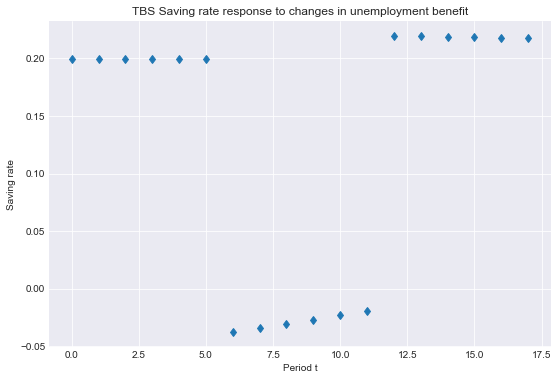

In [10]:
# Simulation 3: 18 periods. 6 periods with original expectation. 6 periods with new expecation. 6 periods back to old.
# Set up run time
periods = 18

# Set up parameter vectors
t = []
c_t = []
m_t = [mTarg]
a_t = []
s_t = []
p_t = [1] # Normalized wage
w_t = 1 # Initial wage

# Parameters
# Factor by which labor income grows 
gamma = MyTBStype.PermGroFac/(1-MyTBStype.UnempPrb) 

# Normalized interest rate 
curly_r = MyTBStype.Rfree / (gamma*w_t)

benefit = 0.3

for i in range(periods):
    
    t.append(i) 
    last_period = i - 1    
        
    if i == 0:
        m_est = m_t[i] / (gamma*w_t)
        
    if i != 0:
        # Update wage vector
        p_t.append(1)
        
        # Update market resources
        if i <= 5 or i >= 12:
        
            m_est = (a_t[last_period] * curly_r) + p_t[i]
        
        else:
            
            m_est = (a_t[last_period] * curly_r) + p_t[i] - benefit
        
        m_t.append(m_est)
        
    # Estimate current consumption
    c_est =  MyTBStype.solution[0].cFunc(m_t[i])
    c_t.append(c_est)
    
    # Define savings rate
    if i <= 5 or i >= 12:
        
        income = ((m_t[i] - 1)/MyTBStype.Rfree)*MyTBStype.rfree + 1
    
    else:
        
        income = ((m_t[i] - 1)/MyTBStype.Rfree)*MyTBStype.rfree + 1 - benefit
        
    s_est = (income - c_t[i]) / income
    s_t.append(s_est)    

    # Define current assets
    a_est = m_t[i] - c_est
    a_t.append(a_est)

plt.figure(figsize=((9,6)))
plt.plot(t, s_t, "d")
plt.xlabel('Period t')
plt.ylabel('Saving rate')
plt.title("TBS Saving rate response to changes in unemployment benefit")
plt.show()

## Problem 2) Asset Pricing in a Financial Crisis

The Lucas economy has two risky assets: subprime ($S$) and other risky assets ($O$). The distinction between $S$ and $O$ is that $S$ is subject to larger shocks than $O$ and therefore, for a given quantity of holdings of the two securities, the covariance between consumption and movements in $S$ will be greater. 

Leading up to period t the two assets were priced according to a belief that the variance of the payoff from a unit holding (a share) of $S$ was $x > 1$ times the size of the variance of the payoff from a share of $O$. Using the Lucas model, describe the pattern you would expect to observe at time t in response to each of the following three possible scenarios (assume nothing else about the economy changes). For each case, describe what happens to the level of the two prices $P_S$ and $P_O$ and to the two price/dividend ratios $P_S/D_S$ and $P_O/D_O$ (assume the subprime market is small relative to the size of the other market).

### Part 2.a)

There is a one-time, permanent drop in the level of dividends per share of $S$ to half the original level. The expected future relative variance of dividends per share for $S$ is unchanged (around this new lower level) in the future. 

From the Lucas Asset pricing model, we know that:

$$P_t = \frac{d_t}{\vartheta}$$

Which further implies:

$$ \vartheta = \frac{d_t}{P_t} \rightarrow \frac{P_S}{D_S} = \frac{P_O}{D_O} = \frac{1}{\vartheta}$$

This suggests that if the level of the dividend per share of $S$ fell to half of its original level, then the price of $S$ would also fall by half. This is because the ratio between dividends and prices are equal to the time preference factor, which is constant. Since subprime market is small relative to the other asset market, the price and the price to dividend ratio for the $O$ asset is unaffected by this movement. Additionally, the price to dividend ratios for $S$ and $O$ are equal to the same constant value. Since the divided and price changed for $S$ by the same amount, this identity will continue to hold, as neither the price nor dividend for $O$ was impacted by this change.

### Part 2.b)

The variance of dividends associated with holding a share of $S$ will be permanently higher, but the mean expected level of dividends remains unchanged.


According to the C-CAPM model, assets that have procyclical payoffs have lower prices than assets that are countercyclical. In other words, if an asset is "safer" and will payout more reliably, then it will be more expensive than an asset that is "riskier" and has a less reliable payout. In this scenario, the variance of the dividend of $S$ has increased but its mean expected level of dividends remains unchanged. This increase in the variance has made holding asset $S$ riskier for a given agent. The C-CAPM model implies that the price of $S$ should be lower into order to account for this higher level of risk. This implies that the ratio of $P_S/D_S$ has decreased as well. Because the size of the subprime market is small, these changes will not affect the price or price to dividend ratio of the $O$ market. 

### Part 2.c)

There is an increase in the level of "risk aversion" (the coefficient of relative risk aversion of the representative agent) in the market. (You can assume that there is a riskless asset in the market as well). 

Under the Lucas model, an increase in risk aversion leads to an increase in the price of an asset, which necessitates an increase in the dividend. This parameter change also suggest that agents will shift away from risky assets in favor of risk-less assets. In the current setting, agents will reduce their holdings of the risky assets $S$ and $O$. The price of both assets will increase as will their dividends, which preserves the ratio of the asset's price to its dividend.  

The C-CAPM model provides a means of understanding these movements. 

$$E_t[\mathbf{R}_{t+1,i}] - R \approx \rho cov(\Delta log (c_{t+1}), \mathbf{R}_{t_1,i})$$

From this equation, it is clear that the right hand side will increase as $\rho$ gets larger. From our understanding of the Lucas model, this leads to an increase in the price and dividend assets, particularly the risky asset. Thus the increase in the right hand side of the equation is offset by an increase in the expected return of the risky asset on the left hand side.